In [ ]:
Problem link- https://hack.univ.ai/

Solution algorithm- Random Forest

ROC_AUC_SCore- 0.89179

Position- 7/1065


In [ ]:
import pandas as pd
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import collections
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from imblearn.under_sampling import RandomUnderSampler
from scipy import spatial as spatial
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from scipy.optimize import linear_sum_assignment
!pip install category_encoders
import category_encoders
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter
import random
from sklearn.metrics import roc_curve, auc
from imblearn.over_sampling import RandomOverSampler
from pprint import pprint
from numpy import where
from imblearn.under_sampling import NeighbourhoodCleaningRule

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path="Training Data.csv"
df_train=pd.read_csv(path)
path="Test Data.csv"
df_test=pd.read_csv(path)

In [ ]:
df_train.state=df_train.state.str.replace('[^a-zA-Z]', '')
df_train.state=df_train.state.str.lower()
df_test.state=df_test.state.str.replace('[^a-zA-Z]', '')
df_test.state=df_test.state.str.lower()
df_train.city=df_train.city.str.replace('[^a-zA-Z]', '')
df_train.city=df_train.city.str.lower()
df_test.city=df_test.city.str.replace('[^a-zA-Z]', '')
df_test.city=df_test.city.str.lower()
df_train.profession=df_train.profession.str.replace('[^a-zA-Z]', '')
df_train.profession=df_train.profession.str.lower()
df_test.profession=df_test.profession.str.replace('[^a-zA-Z]', '')
df_test.profession=df_test.profession.str.lower()

In [ ]:
df_train.head()

In [ ]:
for attr in ['married','car_ownership','house_ownership','profession','city','state']:
  s1=df_train[attr].unique()
  s2=df_test[attr].unique()
  for i in s2:
    np.append(s1,i)
  s1=np.unique(s1)
  dict1=dict()
  dict0=dict()
  for val in s1:
    dict1[val]=0
    dict0[val]=0
  for index,rows in df_train.iterrows():
    if(rows['risk_flag']==1):
      dict1[rows[attr]]+=1
    else:
      dict0[rows[attr]]+=1
  for i in s1:
    #if(dict0[i]==0 and dict1[i]==0):
      #dict1[i]=0.000000001
      #continue
    dict1[i]=dict1[i]/(dict0[i]+dict1[i])
  for i in s1:
    df_train[attr].replace(to_replace=[i], value=[dict1[i]], inplace=True)
    df_test[attr].replace(to_replace=[i], value=[dict1[i]], inplace=True)


In [ ]:
for attr in ['experience','current_house_years','current_job_years','age']:
  s1=df_train[attr].unique()
  s2=df_test[attr].unique()
  for i in s2:
    np.append(s1,i)
  s1=np.unique(s1)
  dict1=dict()
  dict0=dict()
  for val in s1:
    dict1[val]=0
    dict0[val]=0
  for index,rows in df_train.iterrows():
    if(rows['risk_flag']==1):
      dict1[rows[attr]]+=1
    else:
      dict0[rows[attr]]+=1
  for i in s1:
    #if(dict0[i]==0 and dict1[i]==0):
      #dict1[i]=0.000000001
      #continue
    dict1[i]=dict1[i]/(dict0[i]+dict1[i])
  for i in s1:
    df_train[attr].replace(to_replace=[i], value=[dict1[i]], inplace=True)
    df_test[attr].replace(to_replace=[i], value=[dict1[i]], inplace=True)


In [ ]:
df_train.rename({'Id':'c0','income':'c1','age':'c2','experience':'c3','married':'c4','house_ownership':'c5','car_ownership':'c6','profession':'c7','city':'c8','state':'c9','current_job_years':'c10','current_house_years':'c11'}, axis=1, inplace=True)
df_test.rename({'id':'c0','income':'c1','age':'c2','experience':'c3','married':'c4','house_ownership':'c5','car_ownership':'c6','profession':'c7','city':'c8','state':'c9','current_job_years':'c10','current_house_years':'c11'}, axis=1, inplace=True)

In [ ]:
df_train.to_csv('train_v3.csv',index=False)
df_test.to_csv('test_v3.csv',index=False)

In [11]:
path="train_v3.csv"
df_train=pd.read_csv(path)
path="test_v3.csv"
df_test=pd.read_csv(path)

In [12]:
df_test=df_test[['c1','c2','c3','c6','c7','c8','c9','c10','c11']]
train_features=df_train[['c1','c2','c3','c6','c7','c8','c9','c10','c11']]
train_labels=df_train['risk_flag']


In [ ]:
rf=RandomForestClassifier()
rf.fit(train_features,train_labels)
importances = pd.DataFrame({'feature':train_features.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

importances.head(15)
importances.plot.bar()


In [89]:
def get_score(model, X, y, X_val, y_val,test):
    model=model.fit(X, y)
    y_pred1=model.predict_proba(test)[:,1]
    y_pred = model.predict_proba(X_val)[:,1]
    score = roc_auc_score(y_val, y_pred)
    return score,y_pred,y_pred1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.3, random_state=random.randint(23,99),stratify=train_labels)

In [ ]:
y_or=[]
y_t=[]
for i in range(75600):
  y_or.append(0)
for i in range(28000):
  y_t.append(0)
for i in range(20):
  num1=random.randint(0,2)
  num2=random.randint(0,2)
  num3=random.randint(0,2)
  peri1=[40,70,100]
  peri3=['sqrt','log2','auto']
  clf = RandomForestClassifier(
      ccp_alpha=0.000001,
      #bootstrap= True,
      n_estimators=peri1[num1],
      class_weight='balanced_subsample',
      #oob_score=True,
      max_features=peri3[num3],
      random_state=peri1[num1],
  )
  X_train, X_test, y_train, y_test = train_test_split(train_features, train_labels, test_size=0.3, random_state=368,stratify=train_labels)
  sm= SMOTETomek(sampling_strategy='auto')
  cur_train, cury_train=sm.fit_resample(X_train, y_train)
  me_rf_score,y_pred,test_pred = get_score(clf, cur_train, cury_train, X_test, y_test,df_test)
  for ii in range(75600):
    y_or[ii]+=y_pred[ii]
  for ii in range(28000):
    y_t[ii]+=test_pred[ii]

In [149]:
for ii in range(75600):
    y_or[ii]/=20
y_pred=y_or
for ii in range(28000):
    y_t[ii]/=20
y_pred=y_or
test_pred=y_t

Random forest: ROC AUC=0.939832873
No skill: ROC AUC=0.500
Best Threshold=0.162047, G-Mean=0.888
Random forest: ROC AUC=0.893960967
[[52404 13897]
 [   23  9276]]
0.5713229859571323
23173
0.8158730158730159
8674


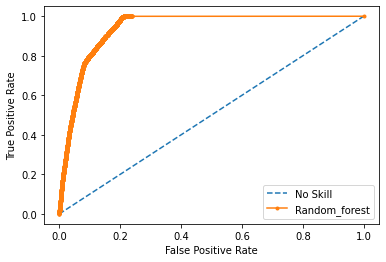

In [150]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, y_pred)
lr_auc = roc_auc_score(y_test, ns_probs)
print('Random forest: ROC AUC=%.9f' % (ns_auc))
print('No skill: ROC AUC=%.3f' % (lr_auc))

ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_pred)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Random_forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
gmeans = np.sqrt(lr_tpr * (1-lr_fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (_[ix], gmeans[ix]))
y_predd1=[]
for j in y_pred:
  if(j<_[ix]):
    y_predd1.append(0)
  else:
    y_predd1.append(1)

ns_auc = roc_auc_score(y_test, y_predd1)
test_pred1=[]
for j in test_pred:
  if(j<_[ix]):
    test_pred1.append(0)
  else:
    test_pred1.append(1)

test_pred1=pd.Series(test_pred1)
print('Random forest: ROC AUC=%.9f' % (ns_auc))

print(confusion_matrix(y_test,y_predd1))
print(metrics.f1_score(y_test,y_predd1))
print(np.sum(y_predd1))
print(accuracy_score(y_test,y_predd1))
print(test_pred1.sum())

In [ ]:
arr=np.arange(np.max([0,_[ix]-0.11]),_[ix]+0.001,0.001)
X=[]
Y=[]
for ii in arr:
  y_pred1=[]
  for j in y_pred:
    if(j<ii):
      y_pred1.append(0)
    else:
      y_pred1.append(1)
  ns_auc = roc_auc_score(y_test, y_pred1)
  X.append(ii)
  Y.append(ns_auc)
plt.plot(X,Y)
print(np.max(Y))

In [151]:
test_pred1.to_csv('fsub2.csv')